# Constructing the training image

In [1]:
from PIL import Image, ImageDraw



In [2]:

im = Image.new('1', (128, 128), 0)
# mode = '1': black / white
# see https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes
draw = ImageDraw.Draw(im)

In [3]:
#draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
#draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))
#draw.line((350, 200, 450, 100), fill=(255, 255, 0), width=10)

#im.save('pillow_imagedraw.jpg', quality=95)


In [4]:
draw.regular_polygon((50, 50, 10), 3, rotation=0, fill=None, outline=1)

In [5]:
#im.show()

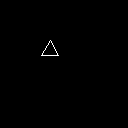

In [6]:
from IPython.display import display
display(im)

# Building the model

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

2.0.0


In [9]:
def get_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

In [10]:
model = get_model()

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
flatten (Flatten)            (None, 952576)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                60964928  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 61,020,737
Trainable params: 61,020,737
Non-trainable params: 0
____________________________________________

## Save initial weights

We will use the same model for multiple experiments. If we just do *model.fit()* again, the weights will start as trained by the previous experiment. Thus, we save the initial (random) weights here and reload them later.

In [12]:
winit = model.get_weights()

# Preparing the training data

In [13]:
import numpy as np

In [14]:
train_images = np.array(im, dtype=np.double)
print(train_images.shape)
train_images = np.expand_dims(train_images, axis=0)
print(train_images.shape)
train_images = np.expand_dims(train_images, axis=train_images.ndim)
print(train_images.shape)

train_labels = np.array((1))
print(train_labels.shape)
train_labels = np.expand_dims(train_labels, axis=0)
print(train_labels.shape)


(128, 128)
(1, 128, 128)
(1, 128, 128, 1)
()
(1,)


# Evaluate w/ initial weights

In [15]:
model.set_weights(winit)
evalinit_train = model.evaluate(x=train_images, y=train_labels)
print(evalinit_train)
print(model.metrics_names)

1/1 [==============================] - 0s 254ms/sample - loss: 0.4725 - accuracy: 1.0000
[0.4725341498851776, 1.0]
['loss', 'accuracy']


# Training

In [16]:
model.set_weights(winit)
history = model.fit(train_images, train_labels, epochs=10)#, 
#                    validation_data=(test_images, test_labels))


Train on 1 samples
Epoch 1/10
1/1 [==============================] - 2s 2s/sample - loss: 0.4725 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 243ms/sample - loss: 0.3766 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 286ms/sample - loss: 0.3133 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 243ms/sample - loss: 0.3133 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 252ms/sample - loss: 0.3133 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 251ms/sample - loss: 0.3133 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 304ms/sample - loss: 0.3133 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 243ms/sample - loss: 0.3133 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 252ms/sample - loss: 0.3133 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 223ms/sample - loss: 0.3133 - 

In [17]:
import pandas as pd
import copy

In [18]:
hist = copy.deepcopy(history.history)
for init_val, name in zip(evalinit_train, model.metrics_names):
    hist[name].insert(0, init_val)
history_df = pd.DataFrame(hist)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

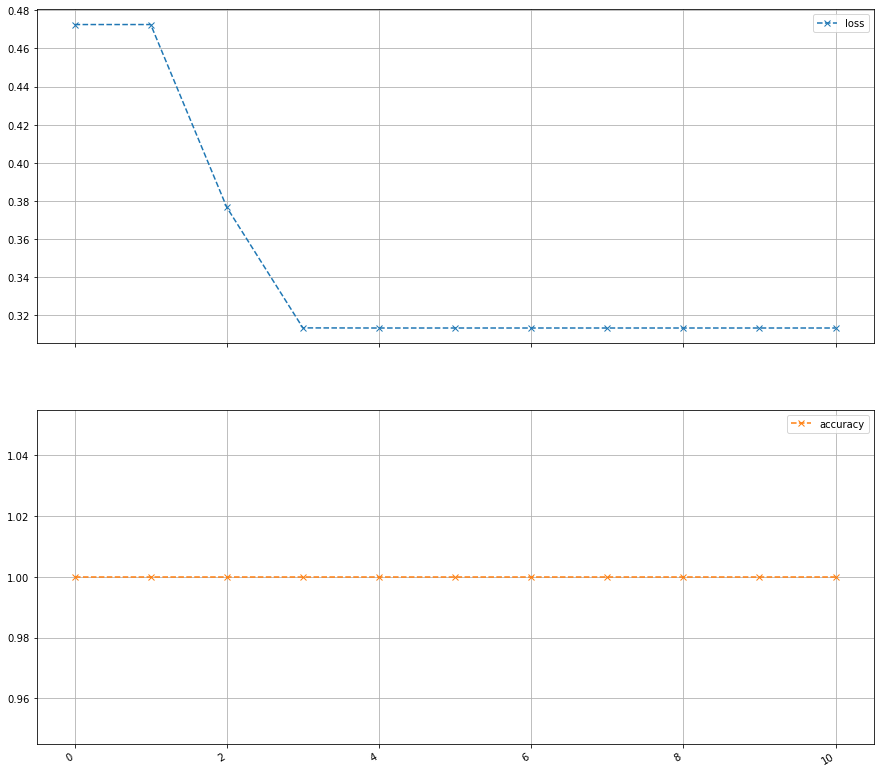

In [19]:
#fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
#history_df.plot(y='loss', ax=axs[0])
#history_df.plot(y='accuracy', ax=axs[1])
history_df.plot(subplots=True, sharex=True, figsize=(15, 15), grid=True, marker='x', ls='--')

# Preparing the test image

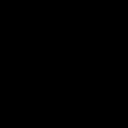

In [20]:
im_test_blank = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_test_blank)
display(im_test_blank)

test_image_blank = np.array(im_test_blank, dtype=np.double)
test_image_blank = np.expand_dims(test_image_blank, axis=0)
test_image_blank = np.expand_dims(test_image_blank, axis=test_image_blank.ndim)

test_labels = np.array((0))
test_labels = np.expand_dims(test_labels, axis=0)


## Evaluate test w/ initial weights

In [21]:
model.set_weights(winit)
evalinit_test = model.evaluate(x=test_image_blank, y=test_labels)
print(evalinit_test)
print(model.metrics_names)

1/1 [==============================] - 0s 38ms/sample - loss: 0.9741 - accuracy: 1.0000
[0.9740769863128662, 1.0]
['loss', 'accuracy']


# Training with validation on blank test image

In [22]:
model.set_weights(winit)
history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_blank, test_labels))


Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 0s 353ms/sample - loss: 0.4725 - accuracy: 1.0000 - val_loss: 0.9966 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 302ms/sample - loss: 0.4071 - accuracy: 1.0000 - val_loss: 1.2152 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 316ms/sample - loss: 0.3195 - accuracy: 1.0000 - val_loss: 1.3125 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 309ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 1.3133 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 337ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 1.3133 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 343ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 1.3133 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 335ms/sample - loss: 0.3133 -

In [23]:
hist = copy.deepcopy(history_inclval.history)
for init_val, name in zip(evalinit_train, model.metrics_names):
    hist[name].insert(0, init_val)
test_metrics_names = [f'val_{name}' for name in model.metrics_names]
for init_val, name in zip(evalinit_test, test_metrics_names):
    hist[name].insert(0, init_val)

<AxesSubplot:>

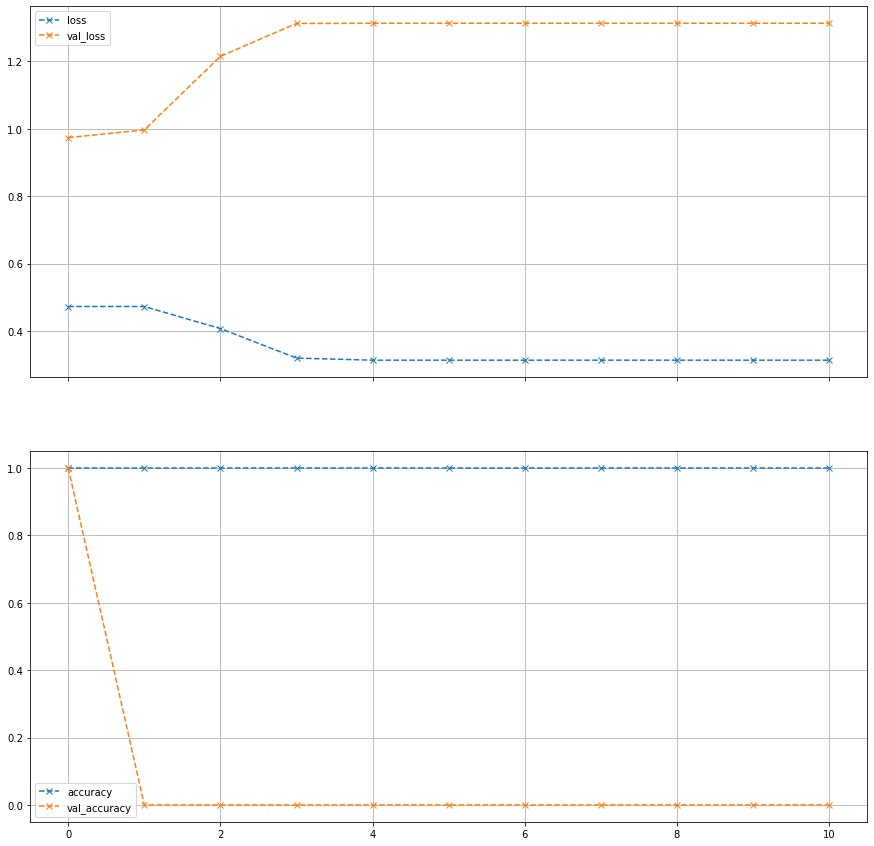

In [24]:
history_inclval_df = pd.DataFrame(hist)
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
history_inclval_df.plot(y=['loss', 'val_loss'], ax=axs[0], grid=True, marker='x', ls='--')
history_inclval_df.plot(y=['accuracy', 'val_accuracy'], ax=axs[1], grid=True, marker='x', ls='--')

It is not surprising that the test loss goes up on the "empty" test image. It has no chance to learn for an "empty" image. The learnable classes are imbalanced in the training set: "Empty" / "no triangle" is not represented in training at all and the model can easily overfit on the one training sample.

# Training w/ validation on "something"

Not empty, but also no triangle.

I assume, we get a false-positive again. That would fit the class imbalance-/ overfit-hypothesis, which means the model probably outputs $1$ ("there is a triangle") every time.

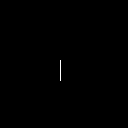

In [25]:
im_test_blank = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_test_blank)
draw.line(((60, 60), (60, 80)), width=1, fill=1)
display(im_test_blank)

test_image_line = np.array(im_test_blank, dtype=np.double)
test_image_line = np.expand_dims(test_image_line, axis=0)
test_image_line = np.expand_dims(test_image_line, axis=test_image_line.ndim)

test_labels = np.array((0))
test_labels = np.expand_dims(test_labels, axis=0)


In [26]:
model.set_weights(winit)
evalinit_test = model.evaluate(x=test_image_line, y=test_labels)
print(evalinit_test)
print(model.metrics_names)

1/1 [==============================] - 0s 31ms/sample - loss: 0.9738 - accuracy: 1.0000
[0.9737906455993652, 1.0]
['loss', 'accuracy']


In [27]:
model.set_weights(winit)
history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_line, test_labels))


Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 0s 365ms/sample - loss: 0.4725 - accuracy: 1.0000 - val_loss: 1.0252 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 344ms/sample - loss: 0.3981 - accuracy: 1.0000 - val_loss: 1.2765 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 368ms/sample - loss: 0.3162 - accuracy: 1.0000 - val_loss: 1.3132 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 317ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 1.3133 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 332ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 1.3133 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 322ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 1.3133 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 323ms/sample - loss: 0.3133 -

In [28]:
hist = copy.deepcopy(history_inclval.history)
for init_val, name in zip(evalinit_train, model.metrics_names):
    hist[name].insert(0, init_val)
test_metrics_names = [f'val_{name}' for name in model.metrics_names]
for init_val, name in zip(evalinit_test, test_metrics_names):
    hist[name].insert(0, init_val)

<AxesSubplot:>

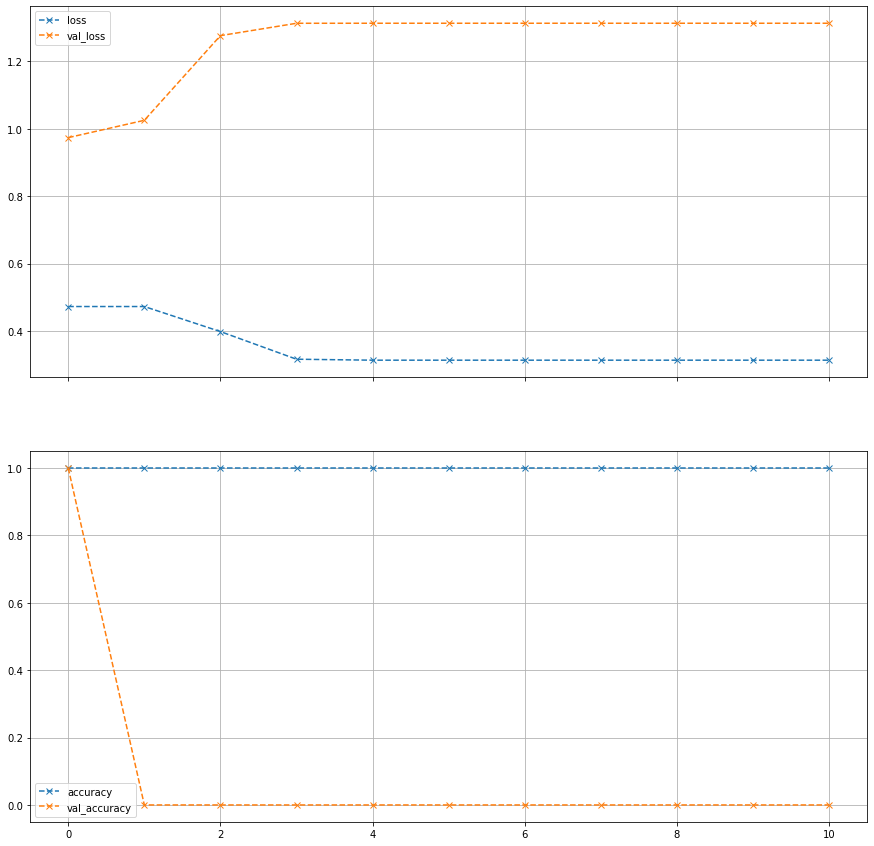

In [29]:
history_inclval_df = pd.DataFrame(hist)
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
history_inclval_df.plot(y=['loss', 'val_loss'], ax=axs[0], grid=True, marker='x', ls='--')
history_inclval_df.plot(y=['accuracy', 'val_accuracy'], ax=axs[1], grid=True, marker='x', ls='--')

# Training w/ test on triangle in another place

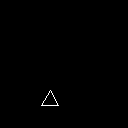

In [30]:
im_test_triangle_lowleft = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_test_triangle_lowleft)
draw.regular_polygon((50, 100, 10), 3, rotation=0, fill=None, outline=1)
display(im_test_triangle_lowleft)

test_image_triangle_lowleft = np.array(im_test_triangle_lowleft, dtype=np.double)
test_image_triangle_lowleft = np.expand_dims(test_image_triangle_lowleft, axis=0)
test_image_triangle_lowleft = np.expand_dims(test_image_triangle_lowleft, axis=test_image_triangle_lowleft.ndim)

test_labels_triangle_lowleft = np.array((1))
test_labels_triangle_lowleft = np.expand_dims(test_labels_triangle_lowleft, axis=0)


In [31]:
model.set_weights(winit)
evalinit_test_triangle_lowleft = model.evaluate(x=test_image_triangle_lowleft, y=test_labels_triangle_lowleft)
print(evalinit_test_triangle_lowleft)
print(model.metrics_names)

1/1 [==============================] - 0s 38ms/sample - loss: 0.4731 - accuracy: 1.0000
[0.47306159138679504, 1.0]
['loss', 'accuracy']


In [32]:
print(model.predict(test_image_triangle_lowleft))

[[0.50269175]]


In [33]:
model.set_weights(winit)
history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_triangle_lowleft, test_labels_triangle_lowleft))


Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 0s 383ms/sample - loss: 0.4725 - accuracy: 1.0000 - val_loss: 0.4298 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 349ms/sample - loss: 0.3975 - accuracy: 1.0000 - val_loss: 0.3196 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 332ms/sample - loss: 0.3156 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 317ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 357ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 337ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 337ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_

<AxesSubplot:>

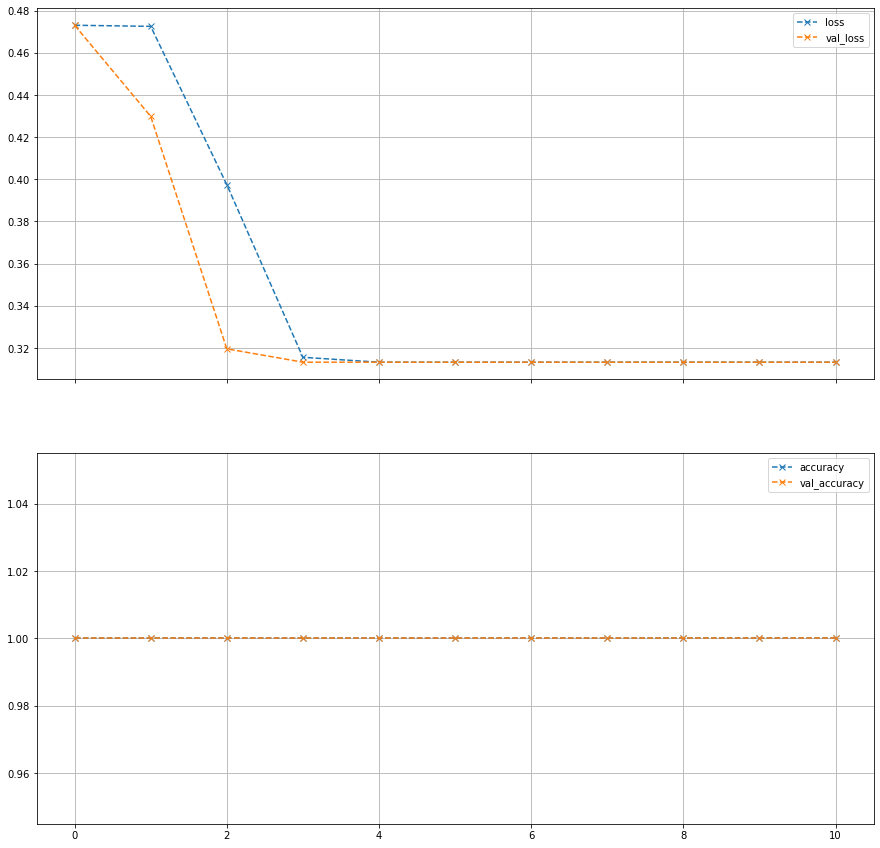

In [34]:
hist = copy.deepcopy(history_inclval.history)
for init_val, name in zip(evalinit_test_triangle_lowleft, model.metrics_names):
    hist[name].insert(0, init_val)
test_metrics_names = [f'val_{name}' for name in model.metrics_names]
for init_val, name in zip(evalinit_test_triangle_lowleft, test_metrics_names):
    hist[name].insert(0, init_val)
    
history_inclval_df = pd.DataFrame(hist)
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
history_inclval_df.plot(y=['loss', 'val_loss'], ax=axs[0], grid=True, marker='x', ls='--')
history_inclval_df.plot(y=['accuracy', 'val_accuracy'], ax=axs[1], grid=True, marker='x', ls='--')

# Testing dependency on weight initialization

In [102]:
histories = {}

for runid in range(20):
    tf.keras.backend.clear_session()
    model = get_model()

    evalinit_train = model.evaluate(x=train_images, y=train_labels)
    evalinit_test_triangle_lowleft = model.evaluate(x=test_image_triangle_lowleft, y=test_labels_triangle_lowleft)

    history_inclval = model.fit(train_images, train_labels, epochs=10, 
                        validation_data=(test_image_triangle_lowleft, test_labels_triangle_lowleft))

    hist = copy.deepcopy(history_inclval.history)
    for init_val, name in zip(evalinit_test_triangle_lowleft, model.metrics_names):
        hist[name].insert(0, init_val)
    test_metrics_names = [f'val_{name}' for name in model.metrics_names]
    for init_val, name in zip(evalinit_test_triangle_lowleft, test_metrics_names):
        hist[name].insert(0, init_val)

    hist = {f'{k}_{runid}': v for (k, v) in hist.items()}
    histories.update(hist)

1/1 [==============================] - 0s 53ms/sample - loss: 0.4738 - accuracy: 1.0000
Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 3s 3s/sample - loss: 0.4737 - accuracy: 1.0000 - val_loss: 0.4696 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 1s 514ms/sample - loss: 0.3732 - accuracy: 1.0000 - val_loss: 0.3157 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 338ms/sample - loss: 0.3134 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 420ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 311ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 332ms/sample - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 7/10
1/1 [=====

<AxesSubplot:>

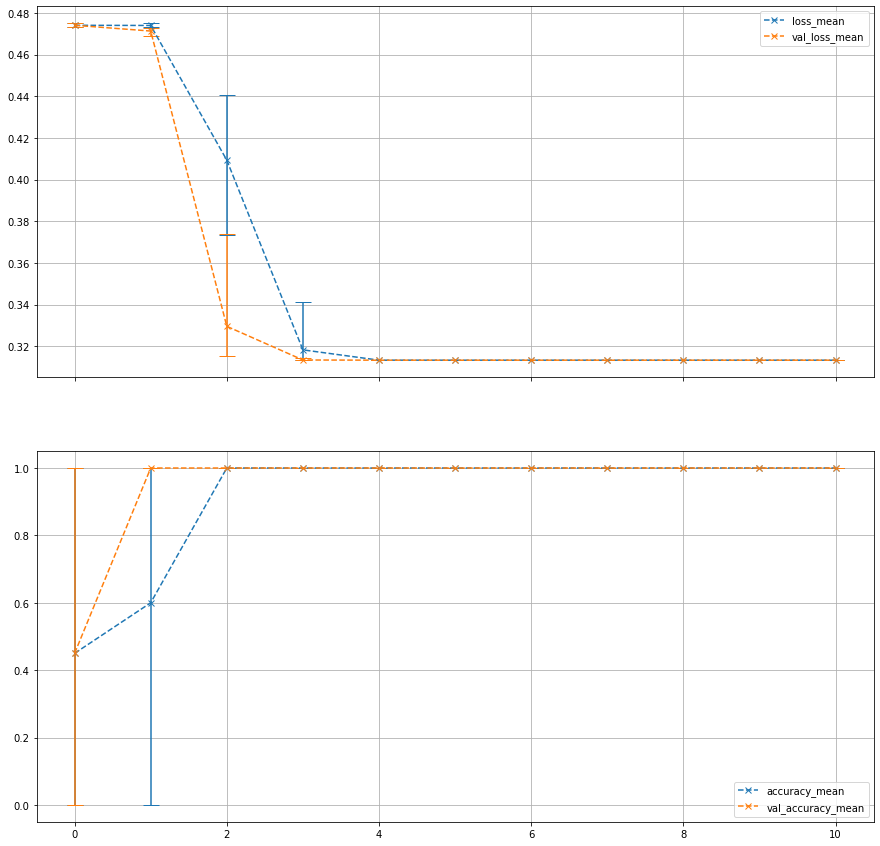

In [107]:
histories_df = pd.DataFrame(histories)
cols = [c.split('_') for c in histories_df.columns]
newcols = [(c[-1], '_'.join(c[:2]) if len(c) == 3 else c[0]) for c in cols]
histories_df.columns = pd.MultiIndex.from_tuples(newcols)
histories_grouped = histories_df.groupby(level=1, axis='columns')
histories_agg = histories_grouped.mean().join(histories_grouped.std(), lsuffix='_mean', rsuffix='_std')
histories_min = histories_grouped.min()
histories_max = histories_grouped.max()
#print(histories_agg)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
loss_cols = [col for col in histories_agg.columns if 'loss_mean' in col]
#loss_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in loss_cols}
loss_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in loss_cols}
accuracy_cols = [col for col in histories_agg.columns if 'accuracy_mean' in col]
#accuracy_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in accuracy_cols}
accuracy_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in accuracy_cols}
histories_agg.plot(y=loss_cols, ax=axs[0], grid=True, marker='x', ls='--', yerr=loss_errs, capsize=8)
histories_agg.plot(y=accuracy_cols, ax=axs[1], grid=True, marker='x', ls='--', yerr=accuracy_errs, capsize=8)
